나만의 Augmented Image 만들어 저장하기

In [11]:
from tqdm.auto import tqdm
import os
from glob import glob
from torchvision.utils import save_image
# from torchvision import transforms as T
from PIL import Image
from src.augmentation import transforms as T

import pandas as pd
import numpy as np

In [7]:
folders = glob(os.path.join("../data/train", "*"))
train_path = []
for folder in tqdm(folders):
    sub = glob(os.path.join(folder, "*"))
    for s in sub:
        if 
    train_path.append(original_sub)
train_path[0][0]

  0%|          | 0/6 [00:00<?, ?it/s]

'../data/train/Styrofoam/0wboqcjuqhgunbvlvpgnjsty.jpg'

In [8]:
len(train_path), len(train_path[0])

(6, 1092)

In [19]:
folders

['../data/train/Styrofoam',
 '../data/train/Paperpack',
 '../data/train/Metal',
 '../data/train/Plastic',
 '../data/train/Paper',
 '../data/train/Plasticbag']

Augmentation 실험해보기

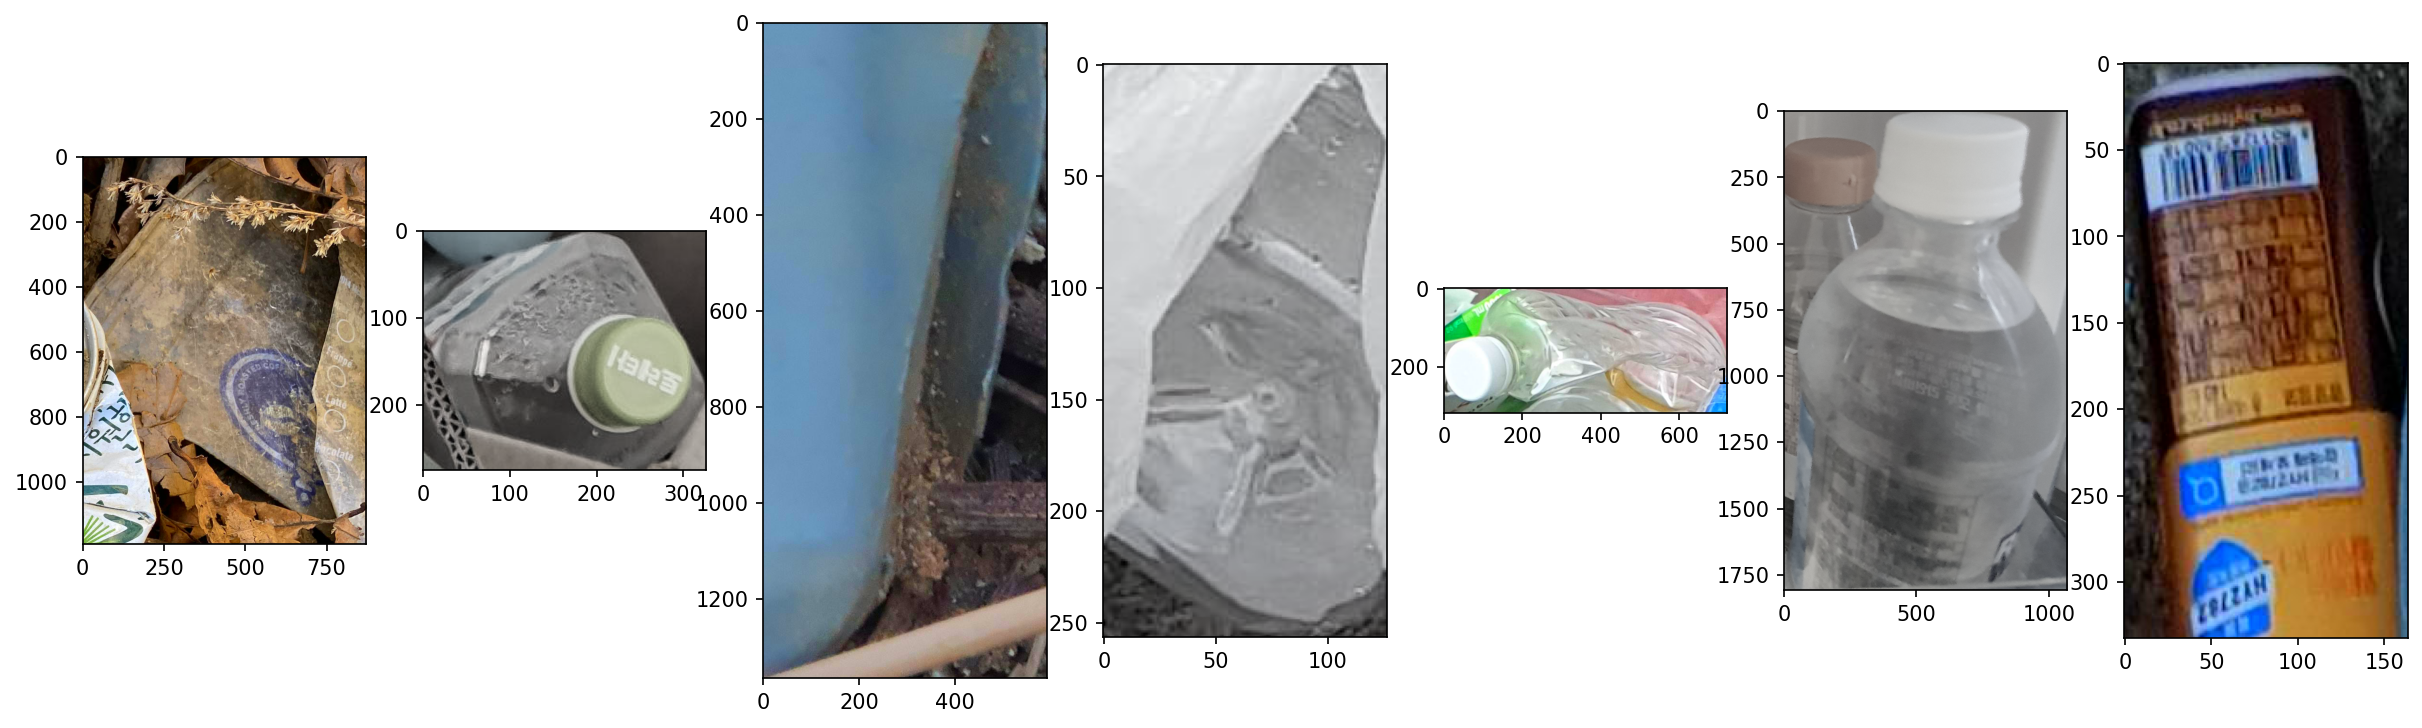

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

P = 20
fig, axes = plt.subplots(1, 7, figsize=(20,20), dpi=150)
for j in range(7):
    n = j + 7*P
    im = Image.open(train_path[3][n])
    # im = T.Cutout(im, 0.5)
    im = T.Color(im, 0.8)
    axes[j].imshow(im)
plt.show()

지정된 경로에 augmentation image folder를 새로 생성하고 그 안에 이미지 저장

In [ ]:
from random import random
from torchvision import transforms

if not os.path.exists("../data/train_aug/"):
    os.mkdir("../data/train_aug/")
    
for idx, folder in enumerate(folders):
    sub_dir = folder.split("/")[-1]
    folder_name = os.path.join("../data/train/", sub_dir)
    if not os.path.exists(folder_name):
        os.mkdir(folder_name)
    
    for path in tqdm(train_path[idx], desc=f"{idx+1}/{len(train_path)} : {sub_dir}"):
        p = random()
        im = Image.open(path)
        if p < 0.4:
            im = T.Cutout(im, 0.5)
        elif p < 0.5:
            im = T.ShearX(im, 0.1)
        elif p < 0.6:
            im = T.ShearY(im, 0.1)
        elif p < 0.7:
            im = T.Sharpness(im, 0.8)
        else:
            im = T.Color(im, 0.8)
        # 마지막에 반드시 ToTensor로 변환 해줘야함
        im = transforms.Compose([transforms.ToTensor()])(im)
        file_path = os.path.join(folder_name, path.split("/")[-1].split(".")[0] + "_aug" + ".jpg")
        save_image(im, file_path)

1/6:   0%|          | 0/1092 [00:00<?, ?it/s]

2/6:   0%|          | 0/1020 [00:00<?, ?it/s]

3/6:   0%|          | 0/1168 [00:00<?, ?it/s]

4/6:   0%|          | 0/2655 [00:00<?, ?it/s]

5/6:   0%|          | 0/4826 [00:00<?, ?it/s]

6/6:   0%|          | 0/4879 [00:00<?, ?it/s]